<a href="https://colab.research.google.com/github/schmelto/machine-learning/blob/main/Deeplearning/Introduction_into_Maploitlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maplotlib Quickstart Guide

## What is `matplotlib` and do we need it?

`matplotlib` is a Python library.
It allows us to create all kinds of diagrams through the `pyplot` module.

We want to use the library primarily to display various diagrams:
- Accuracy of the results of our networks
- correct labels next to the actually recognized digits
- error function

## Import from `matplotlib`

We import the `matplotlib.pyplot` module under the name` plt` so that we have to write less.

In [1]:
import matplotlib.pyplot as plt

### Jupyter Notebook special command: `% matplotlib inline`
* a "magic command" from IPython for `matplotlib`
* enables the output of diagrams directly "inline" in the cell of the notebook
* only necessary for local installation, not for execution in Google Colab

In [2]:
%matplotlib inline

### Ein einfacher Plot

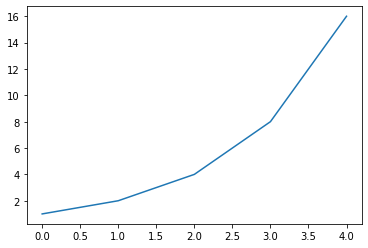

In [3]:
plt.plot([1,2,4,8,16])              # plots specified 5 numbers with standard spacing
plt.show()                          # Draw the plot

When drawing a plot, we always give the values of the definition range first and then the values of the value range.
If only values are given for one axis, this is the value range.

Different spellings for the specification of the lists:
```python
plt.plot ([1,2,3], [1,1,1])
plt.plot (range (1,4), [1] * 3) # equivalent
```

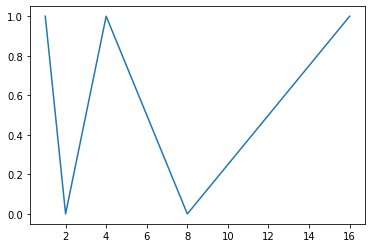

In [4]:
plt.plot([1,2,4,8,16], [1,0,1,0,1])  # Plots the corresponding value from the second list (y-value) for each x-value in the first list
plt.show()                           # Draw the plot

## Labels
We can label both axes with `ylabel ()` and `xlabel ()` and the diagram with `title ()`.

Data can also be available as a dictionary and easily converted into a list.

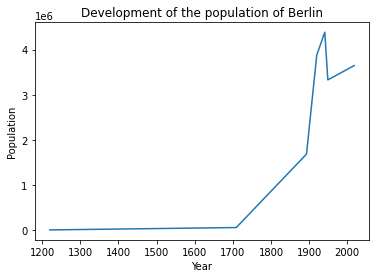

In [5]:
data = {
    1220: 2_400,
    1709: 55_196,
    1893: 1_682_172,
    1920: 3_879_409,
    1941: 4_383_882,
    1949: 3_328_193,
    2018: 3_644_826
}  # Quelle: https://de.wikipedia.org/wiki/Einwohnerentwicklung_von_Berlin
plt.plot(list(data.keys()), list(data.values()))
plt.ylabel("Population")
plt.xlabel("Year")
plt.title("Development of the population of Berlin")
plt.show()

## Change display
We can also determine how our data is presented. The color, connection and the shape of the data points can be specified one after the other in a string.

Colours:
- r: red
- b: blue
- g: green

Or the color can be specified as an RGB value
- color=(177/255, 6/255, 58/255)

Forms of the data points:
- o: period
- s: square

Line types for connections:
- -- dashes
- \- line



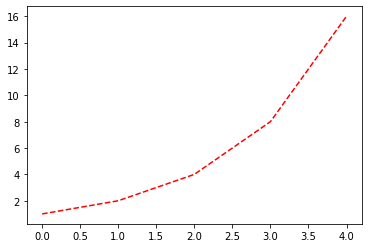

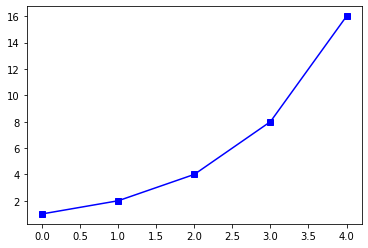

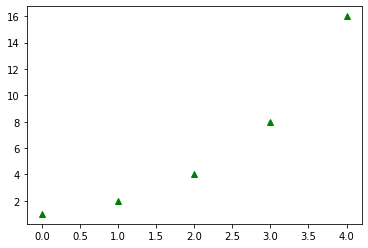

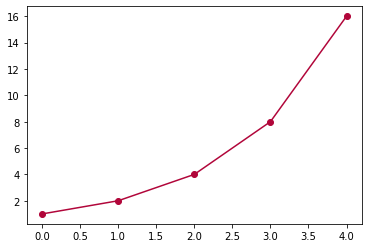

In [6]:
p = [1,2,4,8,16]

plt.plot(p, 'r--')         # 'r--' for red lines
plt.show()

plt.plot(p, 'bs-')         # 'bs' for blue boxes
plt.show()

plt.plot(p, 'g^')          # 'g^' for green triangles
plt.show()

plt.plot(p, 'o-', color=(177/255, 6/255, 58/255))         # own defined color, points connected by lines
plt.show()

## Plot and label functions
* With `label = 'Foo'` we can give a curve a name.
* With `plt.legend ()` this name is displayed in a legend.

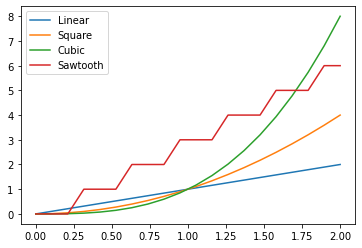

In [7]:
import numpy as np

# Initialization of a Nupmy array as already known (20 values evenly distributed between 0 and 2)
p = np.linspace(0, 2, 20)  

plt.plot(p, p, label='Linear')            # Plots the linear function
plt.plot(p, p**2, label='Square')    # Plots the quadratic function
plt.plot(p, p**3, label='Cubic')        # Plots the cubic function

func = lambda p: p // 0.3                 # Define your own function in the lambda notation
plt.plot(p, func(p) , label='Sawtooth')   # Plots its own modulo function

plt.legend()                              # Show legend
plt.show()                                  

## Plot categorical data with different chart types

* With `plt.figure (figsize = ())` we can display several plots together
* `plt.subplot (1,2)` means that we create a plot with a series of two subplots.
* `figsize = (15,3)` creates a plot of the size 15 x 3
* `sharey = True` divides the labeling of the y-axis
* `bar ()` creates a ** bar chart **
* `scatter ()` creates a ** scatter plot **

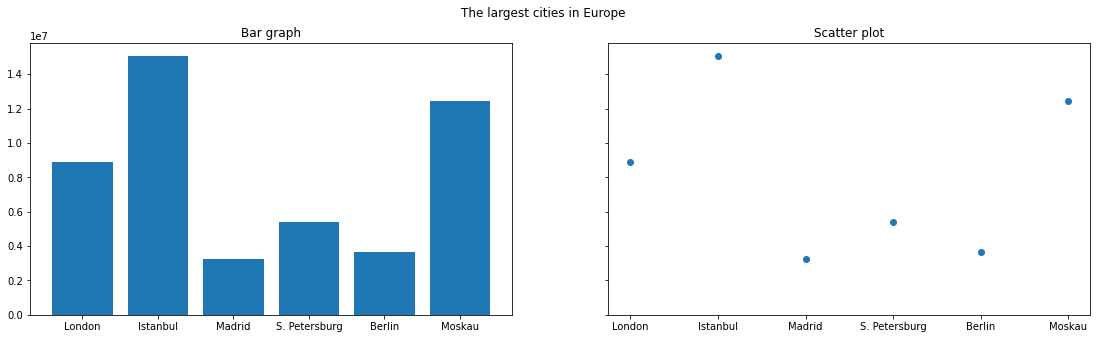

In [8]:
data = {
    "London": 8_908_081	,
    "Istanbul": 15_067_724,
    "Madrid": 3_266_126,
    "S. Petersburg": 5_383_890,
    "Berlin": 3_651_857,
    "Moskau": 12_432_531
}  # Quelle: https://de.wikipedia.org/wiki/Liste_der_gr%C3%B6%C3%9Ften_St%C3%A4dte_Europas (Stand 15.1.2020)

names = list(data.keys())
values = list(data.values())

fig, plots = plt.subplots(1, 2, figsize=(19, 5), sharey=True) # Creates a 1x2 grid of size 19x5 from subplots
                                                              # The subplots should share the y axis
plots[0].bar(names, values)                                   # Plots the values as a bar chart
plots[0].title.set_text("Bar graph")                          # Sets the title of the first subplot
plots[1].scatter(names, values)                               # Plots the values as a scatter plot
plots[1].title.set_text("Scatter plot")                       # Sets the title of the second subplot
fig.suptitle("The largest cities in Europe")                  # Sets the title of the entire plot
plt.show()                                                    # Draw the plot

## Other types of diagrams

**The declaration is similar for all pyplot functions**
* Special parameter for **Pie-Chart** is `explode` (the piece that should be highlighted)

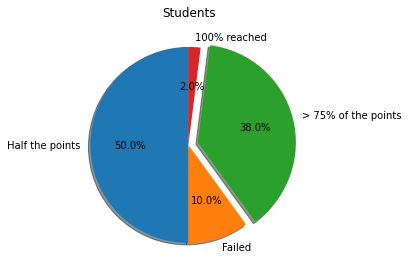

In [9]:
# Kuchendiagramm, Stücke im Uhrzeigesinn:
labels = 'Half the points', 'Failed', '> 75% of the points', '100% reached'
sizes = [50, 10, 38, 2]
explode = (0, 0, 0.1, 0)          # highlight third piece

fig1, ax1 = plt.subplots()
ax1.pie(sizes,                    # Have to generate "Pie Chart" with specified parameters
        explode=explode,         
        labels=labels,           
        autopct='%1.1f%%',        # Specifies the format of the percentage of fields (float with one decimal place)
        shadow=True,              # Shadow for the highlighted field
        startangle=90)            # Specifies the angle by which the specified fields are rotated
ax1.axis('equal')                 # show as a circle
plt.suptitle('Students')
plt.show()

## Plot images

We can use `urlretrieve` to load images from the web or simply specify local files with path when running in a local Jupyter notebook.
* `plt.imread ()` can read images
* `plt.imshow ()` displays the picture
* `# plt.axis ('off')` removes the axes

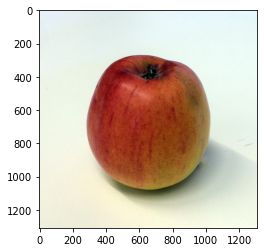

In [10]:
# We need urlretrieve and tempfile to download the image
from urllib.request import urlretrieve
import tempfile

url = "https://upload.wikimedia.org/wikipedia/commons/2/24/Maglemer_%28apple%29.jpg"

with tempfile.NamedTemporaryFile() as file:   # Creates a temporary file
  urlretrieve(url, file.name)                 # Saves the image under file.name
  image = plt.imread(file.name)               # Reads the image under file.name as an image
  # plt.axis('off')                           # Removes the axis labeling
  imgplot = plt.imshow(image)                 # Displays the picture